## Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

sns.set_theme(style ='white',palette = None)


Sample rate could be considered as the resolution of the audio file

## Read the audio files


In [6]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

In [7]:
# Play the first audio file from the dataset
ipd.Audio(audio_files[0])

We can manipulate data only in its raw form by using -> Librosa

y - audio data in its raw form

sr - sample rate

In [15]:
y,sr = librosa.load(audio_files[0])
print(f'y:{y[:10]}')
print(f'shape(y):{y.shape}')
print(f'sample rate:{sr}')

y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape(y):(77988,)
sample rate:22050


<Axes: title={'center': 'Raw Audio Example'}>

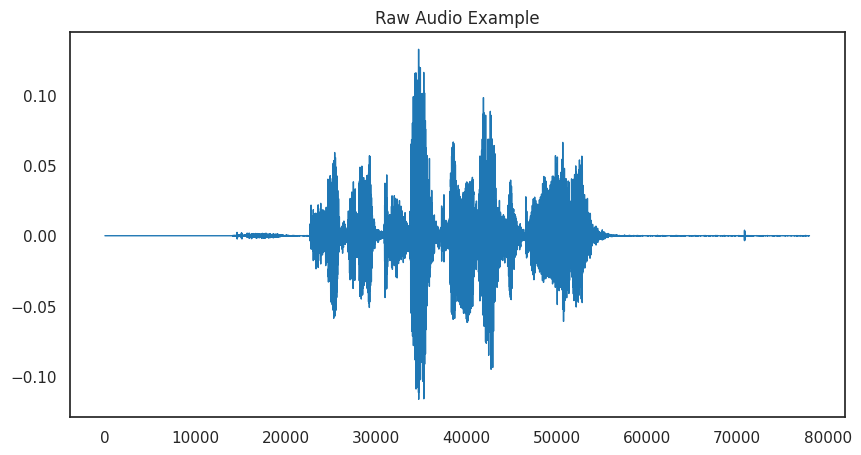

In [17]:
pd.Series(y).plot(figsize = (10,5), lw=1,title = 'Raw Audio Example')

## Trim

Here it can be seen that there exists a lot of silence in the beginning and at the end of the audio file, so we trim it

In [19]:
y_trimmed, _ = librosa.effects.trim(y)
y_trimmed

array([-2.3329334e-05, -7.3082992e-06,  2.2911702e-06, ...,
       -8.7488752e-06, -8.2769502e-06,  3.1732875e-06], dtype=float32)

<Axes: title={'center': 'Raw Audio Example - Trimmed'}>

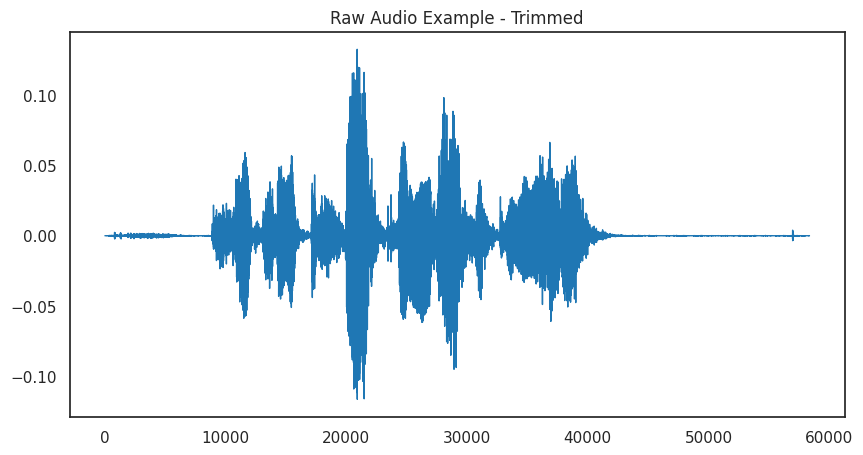

In [20]:
pd.Series(y_trimmed).plot(figsize=(10,5),
                          lw=1,title = 'Raw Audio Example - Trimmed')

## Zoom

<Axes: title={'center': 'Raw Audio Example - Trimmed'}>

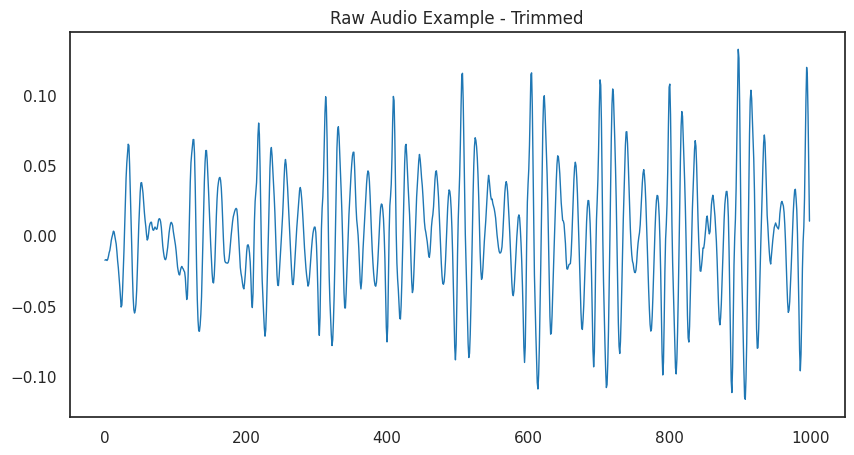

In [22]:
pd.Series(y_trimmed[20000:21000]).plot(figsize=(10,5), lw=1,title = 'Raw Audio Example - Trimmed')

## Spectogram

In [26]:
D = librosa.stft(y)
sdb = librosa.amplitude_to_db(np.abs(D), ref = np.max)
sdb.shape

(1025, 153)

Text(0.5, 1.0, 'Spectogram')

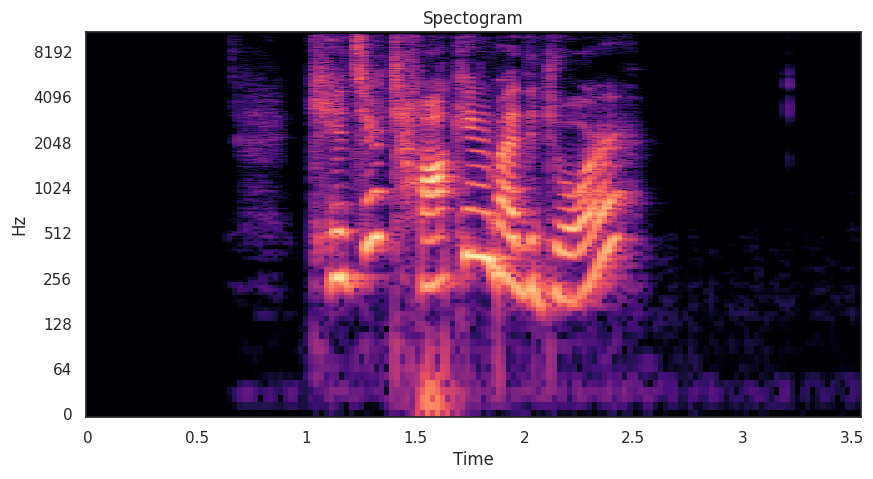

In [33]:
#Plot the spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(sdb, x_axis = 'time', y_axis='log', ax=ax)
ax.set_title('Spectogram')

## Mel Spectogram

In [32]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
Sdb_mel = librosa.amplitude_to_db(np.abs(S),ref = np.max)

Text(0.5, 1.0, 'Mel Spectogram')

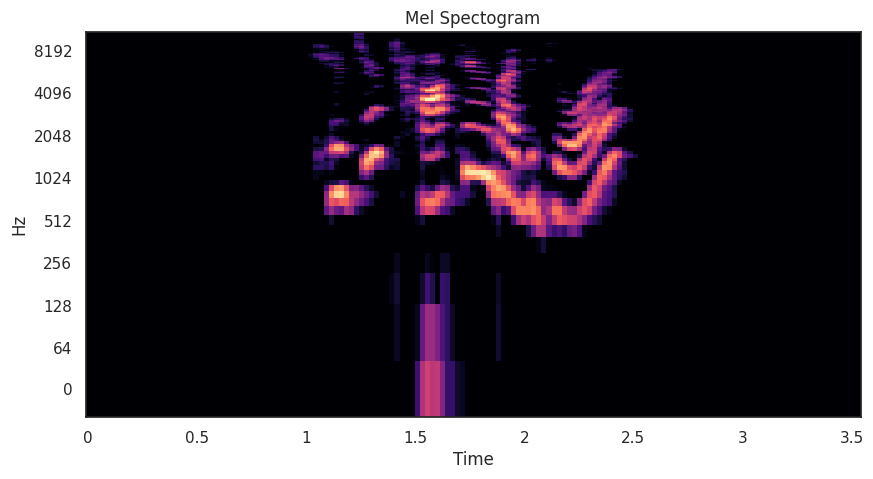

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(Sdb_mel, x_axis = 'time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram')